# Investigation of Deep learning architecture using PyTorch.
Most likely as it pertains to image classification.
todo: implement cuda for GPU calc

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

import torchvision
from torchvision import datasets, transforms

from PIL import Image

## Brushing up on PyTorch library


### Tensors
A simple scalar (e.g., 1) can be represented as a tensor of rank 0, a vector is rank 1, an n × n matrix is rank 2, and so on. In the previous
example, we created a rank 2 tensor with random values by using torch.rand().

In [2]:
#Tensor rank 2
print(torch.rand(2,2))

#Can also be created from lists
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print(x)

#Can change an element using python standard indexing
x[2][-1] = 5 #Can also use negative indices to move from the end inwards
print(x)

#Useful creation functions
print(torch.zeros(2,2))
print(torch.ones(2,2))

tensor([[0.3985, 0.5533],
        [0.2130, 0.8495]])
tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])
tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 5]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


In [3]:
#Tensor addition
print(torch.ones(1,2) + torch.ones(1,2))

#Extracting max value
x = torch.rand(2,2)
print(x)

# Getting the max from the tensor and extracting the value
print(x.max())
print(x.max().item())
#Getting the index of the max from the tensor and extracting the value (Useful for NN class estimation determination)
print(x.argmax())
print(x.argmax().item())

tensor([[2., 2.]])
tensor([[0.6314, 0.8184],
        [0.8813, 0.1436]])
tensor(0.8813)
0.8812609314918518
tensor(2)
2


PyTorch's tensor operations often return a new tensor as a result but some will have an "in-place" update version that has an underscore after the method name.

In [4]:
x = torch.rand(2,2)
print(x)
x.log2() #will return a tensor that I'm currently not assigning
#The original tensor will remain unchanged
print(x)
#In-place
x.log2_()
#Original tensor will be changed
print(x)

tensor([[0.0184, 0.6298],
        [0.6379, 0.5256]])
tensor([[0.0184, 0.6298],
        [0.6379, 0.5256]])
tensor([[-5.7629, -0.6670],
        [-0.6485, -0.9279]])


Other functionality to explore as it comes up:
view
reshapeing

# PyTorch Dataset
Will need the creation of a *Dataset* and a *DataLoader* class.

"Every dataset, no matter whether it includes images, audio, text, 3D landscapes, stock market information, or whatever, can interact with PyTorch if it satisfies this abstract Python class:
```python
class Dataset(object):
    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError
```
    
We have to implement a method that returns the size of our dataset (len), and implement a method that can retrieve an item from our dataset in a (label, tensor) pair. This is called by the data loader as it is pushing data into the neural network for training. So we have to write a body for getitem that can take an image and transform it into a tensor and return that and the label back so PyTorch can operate on it. "

Torchvision is a package that can prepare our datasets for us below.


# Image classification with NN
Cats & Fish
Using ImageNet dataset

## Loading image dataset with torchvision

"Normalizing is important because a lot of multiplication will be happening as the
input passes through the layers of the neural network; keeping the incoming values
between 0 and 1 prevents the values from getting too large during the training phase
(known as the exploding gradient problem). And that magic incarnation is just the
mean and standard deviation of the ImageNet dataset as a whole. You could calculate
it specifically for this fish and cat subset, but these values are decent enough. (If you
were working on a completely different dataset, you’d have to calculate that mean and
deviation, although many people just use these ImageNet constants and report
acceptable results.)"


In [9]:
#Method for checking for valid readable images
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [10]:
train_data_path = "Datasets/CNN with PyTorch/cat_fish_dataset/train/"
val_data_path = "Datasets/CNN with PyTorch/cat_fish_dataset/val/"
test_data_path = "Datasets/CNN with PyTorch/cat_fish_dataset/test/"

img_transformations = transforms.Compose([
    transforms.Resize((64,64)), #resolution 64 x 64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=img_transformations, is_valid_file=check_image)
val_data = torchvision.datasets.ImageFolder(root=val_data_path, transform=img_transformations, is_valid_file=check_image)
test_data = torchvision.datasets.ImageFolder(root=test_data_path, transform=img_transformations, is_valid_file=check_image)

In [38]:
train_data.samples[:5]

[('Datasets/CNN with PyTorch/cat_fish_dataset/train/cat\\10002817_5944408634.jpg',
  0),
 ('Datasets/CNN with PyTorch/cat_fish_dataset/train/cat\\1010884970_1aa4af4701.jpg',
  0),
 ('Datasets/CNN with PyTorch/cat_fish_dataset/train/cat\\1011749488_b465af926a.jpg',
  0),
 ('Datasets/CNN with PyTorch/cat_fish_dataset/train/cat\\1015160097_c4103501de.jpg',
  0),
 ('Datasets/CNN with PyTorch/cat_fish_dataset/train/cat\\1020320535_13679b940e.jpg',
  0)]

## Data Loaders
Responsible for managing feeding data into our NN.

In [11]:
from torch.utils.data import DataLoader

#How many images will fo through the network because we train and update it
#Smaller batches are useful for memory management & faster training because we update the model freq
batch_size=64
train_data_loader = DataLoader(train_data, batch_size=batch_size)
val_data_loader = DataLoader(val_data, batch_size=batch_size)
test_data_loader = DataLoader(test_data, batch_size=batch_size)

#todo: Look at addition parameter tuning suck as shuffling

## Building our Fully connected NN
Fully connected means that every node in a layer affects every node in the next layer, and each connection has a **weight** that determines the straight of the signal from that node going to the next layer.

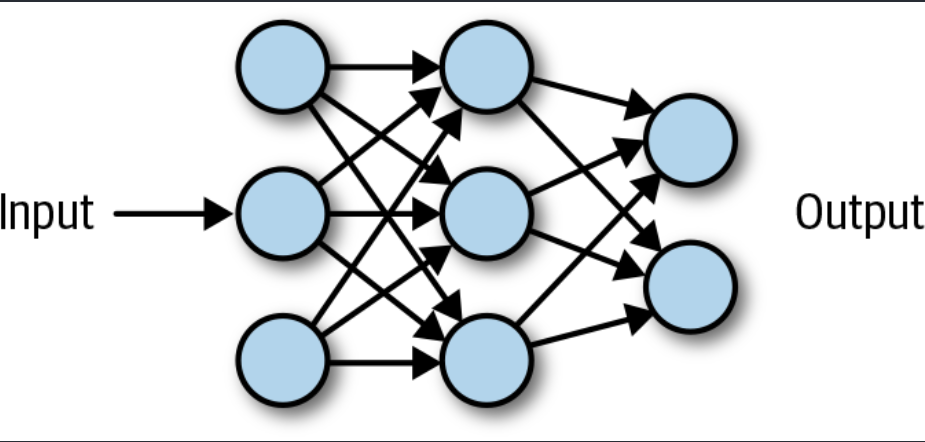


Will be using:
* Input layer (Takes in our images as tensors)
* 1 Hidden layer (probably relu)
* Output layer which will be the size of the num of classes. (2 currently)

Will probably finish it off with a softmax()


Loss function
Cross entropy loss? Recommended for multiclass categorixation.
(Over MSE loss which is more for numerical prediction)

CELoss implements softmax already.


In [20]:
#x and y plus three-channel colour info : red, green, blue
#x  * y  * 3 colour channels
inputSize = 64 * 64 * 3
#These are pretty arbitrary by the goal is to compress the inputs as they progress
layerOneSize = 84
layerTwoSize = 50
#Two possible classes
outputSize = 2 
print(inputSize)

class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__() #varied slightly
        self.fc1 = nn.Linear(inputSize, layerOneSize) 
        self.fc2 = nn.Linear(layerOneSize, layerTwoSize)
        self.fc3 = nn.Linear(layerTwoSize, outputSize)

    def forward(self, x):
        #Convert to 1D vector
        x = x.view(-1, inputSize)
        #torch.nn.functional as F
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) #to output size  
        return x

fullyConnectedNN = FCNN()
print('My fully connected NN layers:', fullyConnectedNN)

12288
My fully connected NN layers: FCNN(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


## Optimizing & Learning rate
-- Can reference my own work with the other NN project for a clear description..

Will need to tune learning rate.


Sample random gradients during a batch. 
PyTorch detault to:
Stochastic gradient descent (need more info for better description)

Other options:

- AdaGrad
- RMSProp
- Adam


### Adam
Uses learning rate PER paramter, adaps the LR to the rate of change of parameter. (Momentum?)
Keeps a exponentially decaying list of gradients and the square gradients to scale the global learning rate.

todo: Learn more or make it myself.

In [22]:
learningRate = 0.01 #Good starting point
#We give the optimizer the weights of our NN that it will update
optimizer = optim.Adam(fullyConnectedNN.parameters(), lr=learningRate)

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")

fullyConnectedNN.to(device)

FCNN(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

## Training

remember that the calculated gradients accumulate so we need to zero grad it

In [25]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20):
    for epoch in range(epochs):
        #Keeping track of the loss values
        training_loss = 0.0
        valid_loss = 0.0
        model.train() #?
        for batch in train_loader:
            optimizer.zero_grad() #compounding gradient handling
            inputs, targets = batch
            #todo cuda calls .to(device)
            #Get the outputs of this forward call through the model
            output = model(inputs)
            #print(output)
            #Calculate the loss of this batch
            loss = loss_fn(output, targets)
            #Back propogation
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0) #?
            #print(loss.data.item() * inputs.size(0) )
        training_loss /= len(train_loader.dataset) #? Scaling the loss by the length of the dataset

        #Validate the training set
        model.eval()
        num_correct = 0
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            #todo cuda call .to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets).view(-1) #??
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.2f} Validation Loss: {:.2f}, accuracy = {:.2f}'.format(
            epoch, training_loss, valid_loss, num_correct / num_examples
        ))




In [30]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(epochs):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [31]:
#Fresh model each time
fullyConnectedNN = FCNN()
learningRate = 0.01 #Good starting point
#We give the optimizer the weights of our NN that it will update
optimizer = optim.Adam(fullyConnectedNN.parameters(), lr=learningRate)

#Todo sort out this training for smoother convergence
train(fullyConnectedNN, optimizer=optimizer, loss_fn=torch.nn.CrossEntropyLoss(), 
train_loader=train_data_loader, val_loader=val_data_loader)

Epoch: 0, Training Loss: 122.37, Validation Loss: 1.34, accuracy = 0.64
Epoch: 1, Training Loss: 0.78, Validation Loss: 0.86, accuracy = 0.40
Epoch: 2, Training Loss: 0.74, Validation Loss: 0.73, accuracy = 0.40
Epoch: 3, Training Loss: 0.64, Validation Loss: 4.05, accuracy = 0.40
Epoch: 4, Training Loss: 1.20, Validation Loss: 0.77, accuracy = 0.40
Epoch: 5, Training Loss: 0.68, Validation Loss: 0.90, accuracy = 0.40
Epoch: 6, Training Loss: 0.68, Validation Loss: 0.77, accuracy = 0.40
Epoch: 7, Training Loss: 0.64, Validation Loss: 0.98, accuracy = 0.40
Epoch: 8, Training Loss: 0.70, Validation Loss: 0.95, accuracy = 0.40
Epoch: 9, Training Loss: 0.77, Validation Loss: 0.67, accuracy = 0.65
Epoch: 10, Training Loss: 0.69, Validation Loss: 0.75, accuracy = 0.66
Epoch: 11, Training Loss: 0.73, Validation Loss: 0.67, accuracy = 0.66
Epoch: 12, Training Loss: 0.64, Validation Loss: 10.55, accuracy = 0.64
Epoch: 13, Training Loss: 1.90, Validation Loss: 0.68, accuracy = 0.65
Epoch: 14, Tr

# Predictions

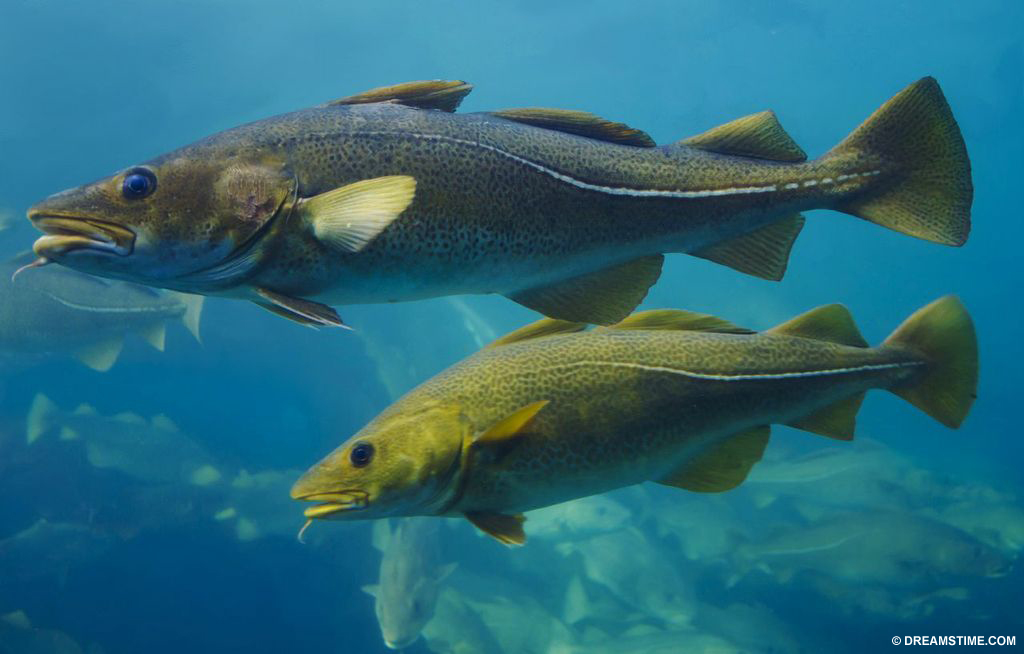

fish


In [37]:
#Just do a single one for now
labels = ['cat', 'fish']

img = Image.open("Datasets/CNN with PyTorch/cat_fish_dataset/test/fish/cod-fish.jpg")
display(img)
img = img_transformations(img)

prediction = F.softmax(fullyConnectedNN(img), dim=1)
prediction = prediction.argmax()
print(labels[prediction])